<a href="https://colab.research.google.com/github/r0ckyyy01/Python/blob/main/assignment_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Speed_kmph           0
Driver_Age           0
Num_Vehicles         0
Alcohol_Involved     0
Seatbelt_Used        0
Accident_Severity    0
dtype: int64


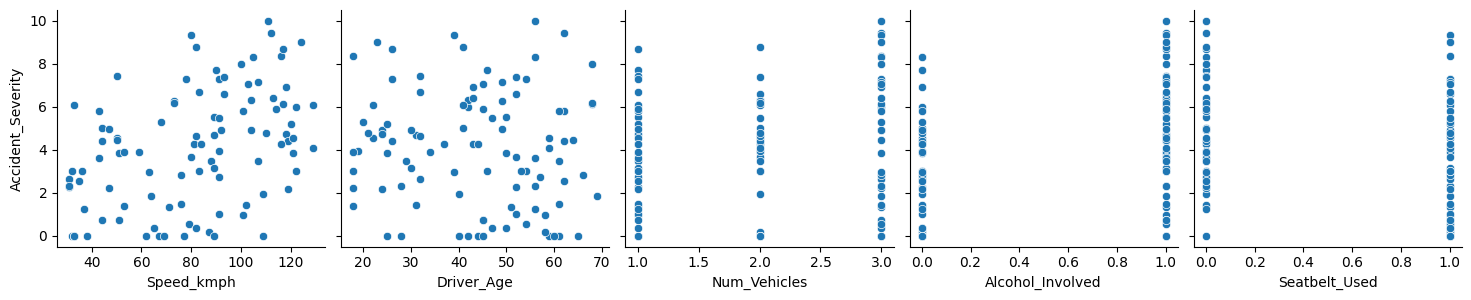

Training set: (80, 5)  Test set: (20, 5)
Intercept: [1.78917826]
Coefficients: [[ 0.03026097 -0.04372219  0.63516725  2.52225586 -1.7561275 ]]
Mean Absolute Error (MAE): 1.5753348300791914
Root Mean Squared Error (RMSE): 1.996737907788043
R² Score: 0.0761731911121668


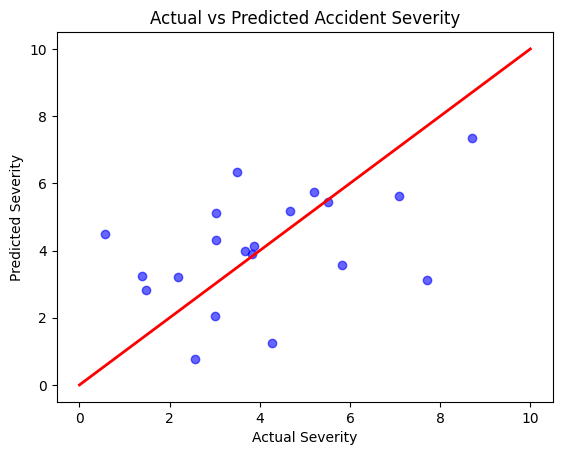

Model saved as 'Accident_Severity_Model.pkl'

Predicted Accident Severity for hypothetical case: 7.514811179357743


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

np.random.seed(42)
n = 100
data = {
'Speed_kmph': np.random.randint(30, 130, n),
'Driver_Age': np.random.randint(18, 70, n),
'Num_Vehicles': np.random.randint(1, 4, n),
'Alcohol_Involved': np.random.randint(0, 2, n),
'Seatbelt_Used': np.random.randint(0, 2, n)
}

data['Accident_Severity'] = (
0.04 * (data['Speed_kmph']) -
0.03 * (data['Driver_Age']) +
0.7 * (data['Num_Vehicles']) +
2.0 * (data['Alcohol_Involved']) -
1.5 * (data['Seatbelt_Used']) +
np.random.normal(0, 2, n)
).clip(0, 10)

df = pd.DataFrame(data)
df.head()

print(df.isnull().sum())
df.dropna(inplace=True)

sns.pairplot(df, x_vars=['Speed_kmph','Driver_Age','Num_Vehicles','Alcohol_Involved','Seatbelt_Used'],
y_vars='Accident_Severity', height=3, aspect=1)
plt.show()

X = df[['Speed_kmph','Driver_Age','Num_Vehicles','Alcohol_Involved','Seatbelt_Used']]
y = df[['Accident_Severity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, " Test set:", X_test.shape)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, 10], [0, 10], color='red', linewidth=2)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs Predicted Accident Severity")
plt.show()

joblib.dump(regressor, 'Accident_Severity_Model.pkl')
print("Model saved as 'Accident_Severity_Model.pkl'")

new_data = pd.DataFrame({
'Speed_kmph':[100],
'Driver_Age':[25],
'Num_Vehicles':[2],
'Alcohol_Involved':[1],
'Seatbelt_Used':[0]
})

predicted = regressor.predict(new_data)
print("\nPredicted Accident Severity for hypothetical case:", predicted[0][0])